<a href="https://colab.research.google.com/github/NithinReddy215/machine-learning/blob/main/ML_assignment1_175.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (a) Load datasets and create X, y
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Logistic regression dataset (classification)
bc = load_breast_cancer()
X_class = bc.data
y_class = bc.target

# Linear regression dataset (regression)
cal = fetch_california_housing()
X_reg = cal.data
y_reg = cal.target

# Standardize both datasets
scaler_class = StandardScaler()
X_class = scaler_class.fit_transform(X_class)

scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X_reg)

print("Classification data shape:", X_class.shape)
print("Regression data shape:", X_reg.shape)


Classification data shape: (569, 30)
Regression data shape: (20640, 8)


In [ ]:
# (b) Split the data at random into train (80%) and test (20%)

from sklearn.model_selection import train_test_split

# Logistic Regression dataset split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Linear Regression dataset split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Classification dataset:")
print("Train size:", Xc_train.shape, "Test size:", Xc_test.shape)

print("\nRegression dataset:")
print("Train size:", Xr_train.shape, "Test size:", Xr_test.shape)


Classification dataset:
Train size: (455, 30) Test size: (114, 30)

Regression dataset:
Train size: (16512, 8) Test size: (4128, 8)


In [ ]:
# (c) Demonstrate logistic regression objective with L2 regularization

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


lam = 1.0
C = 1 / lam
clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=5000)
clf.fit(Xc_train, yc_train)


y_prob = clf.predict_proba(Xc_train)[:, 1]


cross_entropy = log_loss(yc_train, y_prob)


l2_penalty = (lam / 2) * np.sum(clf.coef_ ** 2)

# Final objective
J = cross_entropy + l2_penalty

print(f"Cross-Entropy: {cross_entropy:.4f}")
print(f"L2 Penalty: {l2_penalty:.4f}")
print(f"Total Objective J(w): {J:.4f}")


Cross-Entropy: 0.0514
L2 Penalty: 6.4517
Total Objective J(w): 6.5031


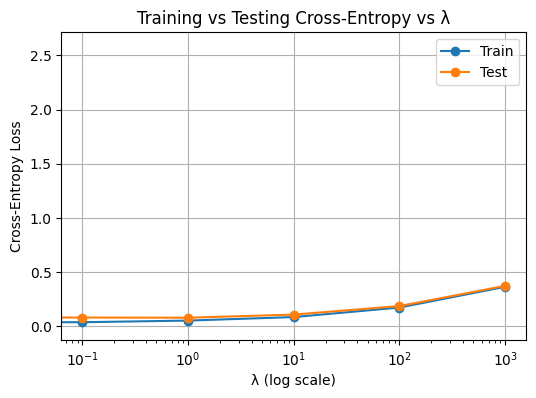

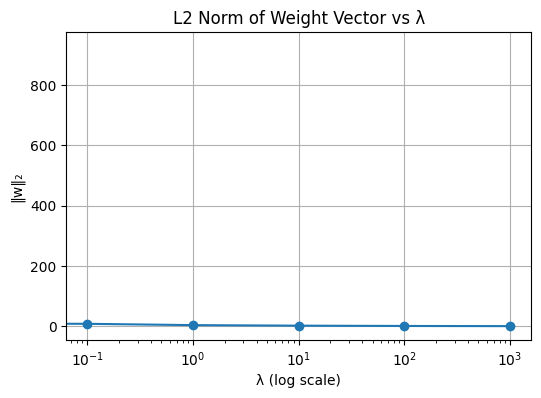

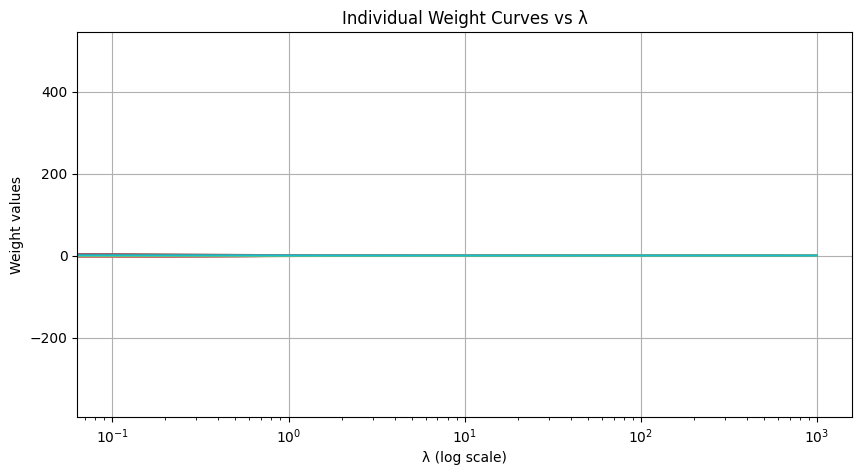

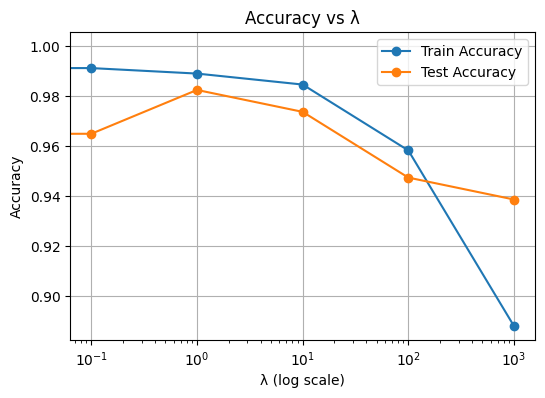

In [ ]:
# (d) Logistic Regression with different λ values and performance plots

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score

# λ values to test
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_logloss = []
test_logloss = []
train_acc = []
test_acc = []
weight_norms = []
weights = []

for lam in lambdas:
    # In sklearn: smaller C = stronger regularization
    if lam == 0:
        C = 1e12   # effectively no regularization
    else:
        C = 1 / lam

    clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=10000, random_state=42)
    clf.fit(Xc_train, yc_train)

    # Predictions
    y_train_prob = clf.predict_proba(Xc_train)[:, 1]
    y_test_prob = clf.predict_proba(Xc_test)[:, 1]

    # Loss and accuracy
    train_logloss.append(log_loss(yc_train, y_train_prob))
    test_logloss.append(log_loss(yc_test, y_test_prob))
    train_acc.append(accuracy_score(yc_train, clf.predict(Xc_train)))
    test_acc.append(accuracy_score(yc_test, clf.predict(Xc_test)))

    # Weight vector and its norm
    weights.append(clf.coef_.flatten())
    weight_norms.append(np.linalg.norm(clf.coef_))

# --- Plot 1: Cross-entropy vs λ ---
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, train_logloss, marker='o', label='Train')
plt.semilogx(lambdas, test_logloss, marker='o', label='Test')
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training vs Testing Cross-Entropy vs λ")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: L2 norm of weights ---
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, weight_norms, marker='o')
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂")
plt.title("L2 Norm of Weight Vector vs λ")
plt.grid(True)
plt.show()

# --- Plot 3: Individual weight values ---
plt.figure(figsize=(10,5))
weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.semilogx(lambdas, weights[:, i])
plt.xlabel("λ (log scale)")
plt.ylabel("Weight values")
plt.title("Individual Weight Curves vs λ")
plt.grid(True)
plt.show()

# --- Plot 4: Accuracy vs λ ---
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.semilogx(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

import numpy as np

def gaussian_basis_transform(X, n_basis=5, mus_range=(-10, 10), sigma=1.0):

    X = np.asarray(X)
    n_samples, n_features = X.shape
    mus = np.linspace(mus_range[0], mus_range[1], n_basis)  # shape (n_basis,)

    # Prepare output matrix
    X_phi = np.zeros((n_samples, n_features * n_basis))

    # For each original feature, compute its n_basis responses
    for j in range(n_features):
        x_col = X[:, j].reshape(-1, 1)                # shape (n_samples, 1)
        mus_row = mus.reshape(1, -1)                  # shape (1, n_basis)
        # Gaussian basis: exp(-0.5 * ((x - mu)^2) / sigma^2)
        phi = np.exp(-0.5 * ((x_col - mus_row) ** 2) / (sigma ** 2))
        X_phi[:, j * n_basis : (j + 1) * n_basis] = phi

    return X_phi

# Example: apply transform for several sigma values and print shapes
sigma_values = [0.1, 0.5, 1, 5, 10]
n_basis = 5

transformed_train = {}
transformed_test = {}

for sigma in sigma_values:
    Xc_train_phi = gaussian_basis_transform(Xc_train, n_basis=n_basis, mus_range=(-10,10), sigma=sigma)
    Xc_test_phi  = gaussian_basis_transform(Xc_test,  n_basis=n_basis, mus_range=(-10,10), sigma=sigma)
    # optionally add bias column later when needed; here we only transform the inputs
    transformed_train[sigma] = Xc_train_phi
    transformed_test[sigma]  = Xc_test_phi
    print(f"sigma={sigma:4g} -> Train shape: {Xc_train_phi.shape}, Test shape: {Xc_test_phi.shape}")

# If you want a version with a bias column appended (useful for closed-form/regression):
def add_bias_column(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Example: show one with bias
sigma_example = 1.0
Xc_train_phi_biased = add_bias_column(transformed_train[sigma_example])
print("\nExample with bias (sigma=1.0):", Xc_train_phi_biased.shape)


sigma= 0.1 -> Train shape: (455, 150), Test shape: (114, 150)
sigma= 0.5 -> Train shape: (455, 150), Test shape: (114, 150)
sigma=   1 -> Train shape: (455, 150), Test shape: (114, 150)
sigma=   5 -> Train shape: (455, 150), Test shape: (114, 150)
sigma=  10 -> Train shape: (455, 150), Test shape: (114, 150)

Example with bias (sigma=1.0): (455, 151)


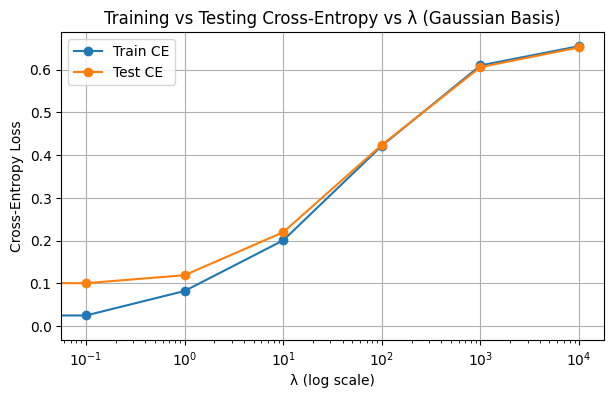

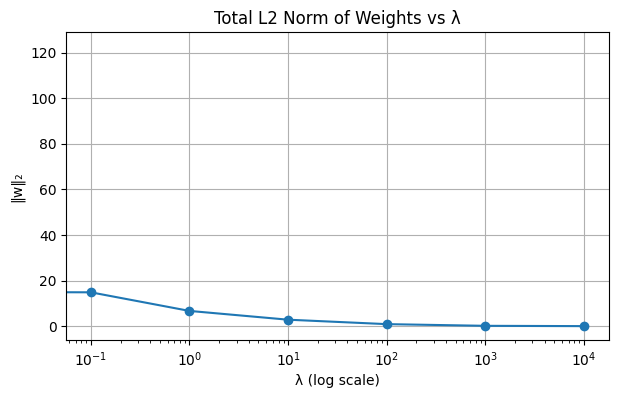

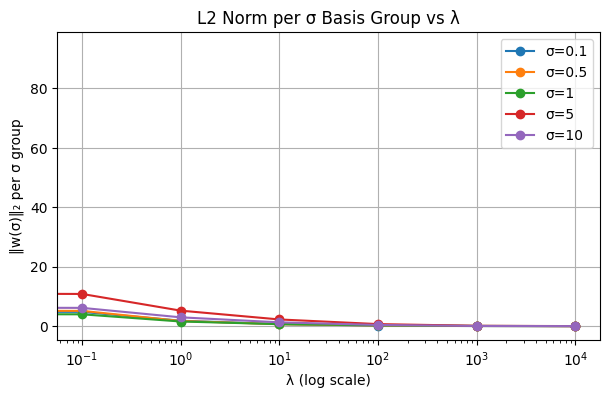

In [ ]:
# (g) Logistic Regression with Gaussian basis features (all σs) and L2 regularization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Prepare combined Gaussian basis feature set: concatenate all σ versions
Xc_train_all = np.hstack([transformed_train[s] for s in [0.1, 0.5, 1, 5, 10]])
Xc_test_all  = np.hstack([transformed_test[s]  for s in [0.1, 0.5, 1, 5, 10]])

lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
train_ce, test_ce, w_norms = [], [], []
sigma_w_norms = {s: [] for s in [0.1, 0.5, 1, 5, 10]}

# Determine how many features per σ group
features_per_sigma = transformed_train[0.1].shape[1]

for lam in lambdas:
    if lam == 0:
        C = 1e12  # No regularization
    else:
        C = 1.0 / lam

    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=10000)
    model.fit(Xc_train_all, yc_train)

    y_train_prob = model.predict_proba(Xc_train_all)[:,1]
    y_test_prob  = model.predict_proba(Xc_test_all)[:,1]

    train_ce.append(log_loss(yc_train, y_train_prob))
    test_ce.append(log_loss(yc_test, y_test_prob))
    w_norms.append(np.linalg.norm(model.coef_))

    # Compute L2 norm of weights per σ group
    w = model.coef_.flatten()
    for i, s in enumerate([0.1, 0.5, 1, 5, 10]):
        start = i * features_per_sigma
        end   = (i+1) * features_per_sigma
        sigma_w_norms[s].append(np.linalg.norm(w[start:end]))

# --- Plot 1: Cross-Entropy vs λ ---
plt.figure(figsize=(7,4))
plt.semilogx(lambdas, train_ce, marker='o', label='Train CE')
plt.semilogx(lambdas, test_ce, marker='o', label='Test CE')
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training vs Testing Cross-Entropy vs λ (Gaussian Basis)")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: L2 norm of full weight vector ---
plt.figure(figsize=(7,4))
plt.semilogx(lambdas, w_norms, marker='o')
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂")
plt.title("Total L2 Norm of Weights vs λ")
plt.grid(True)
plt.show()

# --- Plot 3: L2 norms per σ group ---
plt.figure(figsize=(7,4))
for s in [0.1, 0.5, 1, 5, 10]:
    plt.semilogx(lambdas, sigma_w_norms[s], marker='o', label=f'σ={s}')
plt.xlabel("λ (log scale)")
plt.ylabel("‖w(σ)‖₂ per σ group")
plt.title("L2 Norm per σ Basis Group vs λ")
plt.legend()
plt.grid(True)
plt.show()


(h) Designing Gaussian basis functions that capture relationships between inputs — explanation and bias–variance impact

1. What it means to capture relationships between inputs

So far we used univariate Gaussians applied independently to each input feature
𝑥
𝑗
x
j
	​

. That captures only marginal behavior of each feature.

To capture interactions (how features jointly influence the target), the basis must respond to combinations of features — i.e., be multivariate.

2. Options for bases that capture input relationships

a) Multivariate Gaussian basis (full or diagonal covariance)

Define basis functions

𝜙
𝑖
(
𝑥
)
=
exp
⁡
 ⁣
(
−
1
2
(
𝑥
−
𝜇
𝑖
)
⊤
Σ
−
1
(
𝑥
−
𝜇
𝑖
)
)
ϕ
i
	​

(x)=exp(−
2
1
	​

(x−μ
i
	​

)
⊤
Σ
−1
(x−μ
i
	​

))

where
𝜇
𝑖
μ
i
	​

 is a center in the full input space and
Σ
Σ is a covariance (can be isotropic
𝜎
2
𝐼
σ
2
I or a full matrix).

These bases fire for regions of the input space, capturing joint patterns and interactions.

b) Product of univariate Gaussians on selected feature subsets

If full multivariate bases are too expensive, create bases on pairs or small groups of features:

𝜙
𝑖
(
𝑥
𝑎
,
𝑥
𝑏
)
=
exp
⁡
 ⁣
(
−
(
𝑥
𝑎
−
𝜇
𝑎
)
2
+
(
𝑥
𝑏
−
𝜇
𝑏
)
2
2
𝜎
2
)
.
ϕ
i
	​

(x
a
	​

,x
b
	​

)=exp(−
2σ
2
(x
a
	​

−μ
a
	​

)
2
+(x
b
	​

−μ
b
	​

)
2
	​

).

This captures pairwise interactions without full high-dimensional centers.

c) Centers learned from data (e.g., k-means / GMM)

Choose
{
𝜇
𝑖
}
{μ
i
	​

} using k-means clustering or Gaussian Mixture Model (GMM) on the input vectors. That places bases where data actually lie, improving efficiency vs. evenly spaced centers.

d) Kernel methods (RBF kernel)

Instead of explicit basis expansion, use an RBF kernel for e.g. kernel logistic regression / kernel ridge. This implicitly uses infinitely many RBFs centered at training points and captures complex interactions.

3. Effect on bias–variance trade-off

More expressive bases → lower bias, higher variance.

Multivariate or many centers increases model capacity: it can fit complicated relationships (reduces bias) but also tends to overfit (increases variance) if not regularized or if data are limited.

Dimensionality / sample complexity:

Full multivariate Gaussians in
𝑑
d dimensions require many centers to tile the space well. With limited data, this leads to high variance and poor generalization (curse of dimensionality).

Mitigations / controls:

Use regularization (L2/L1) to shrink weights and control variance.

Use model selection (cross-validation) to choose number of centers, covariance scale
𝜎
σ, and regularization strength
𝜆
λ.

Prefer learned centers (k-means) rather than dense grid centers — more efficient use of parameters.

Use sparse / local bases (compact support or narrow σ) but combine with strong regularization to avoid extreme overfitting.

Use dimensionality reduction (PCA) or construct interaction features only for selected important variables.

4. Practical recommendations

If
𝑑
d is small (2–10): consider full multivariate RBFs with learned centers (k-means) and moderate regularization.

If
𝑑
d is moderate/large: either (i) use product bases over small subsets (pairwise), (ii) use k-means centers + isotropic σ, or (iii) use kernel methods with careful regularization and (if needed) Nyström / random feature approximations to scale.

Always tune
𝜎
σ, number of centers, and λ by cross-validation. Report train/test curves to check bias/variance behavior.

5. Summary (one-liner)
To capture interactions, use multivariate Gaussian bases (or grouped-product bases) with centers learned from data; this increases representational power (lower bias) but requires regularization and careful center/σ selection to avoid a big rise in variance.

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load dataset
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

# Explore data
print(df_housing.head())
print(df_housing.info())
print(df_housing.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [ ]:
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# Explore data
print(df_cancer.head())
print(df_cancer.info())
print(df_cancer['target'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Check for missing values
print(df_housing.isnull().sum())

# Split into features and target
X_h = df_housing.drop('MedHouseVal', axis=1)
y_h = df_housing['MedHouseVal']

# Train-Test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

# Feature scaling
scaler_h = StandardScaler()
Xh_train_scaled = scaler_h.fit_transform(Xh_train)
Xh_test_scaled = scaler_h.transform(Xh_test)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Features and target
X_c = df_cancer.drop('target', axis=1)
y_c = df_cancer['target']

# Train-Test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# Feature scaling
scaler_c = StandardScaler()
Xc_train_scaled = scaler_c.fit_transform(Xc_train)
Xc_test_scaled = scaler_c.transform(Xc_test)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(Xh_train_scaled, yh_train)
yh_pred = lr.predict(Xh_test_scaled)

print("Linear Regression R2 Score:", r2_score(yh_test, yh_pred))
print("Linear Regression MSE:", mean_squared_error(yh_test, yh_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(Xh_train_scaled, yh_train)
yr_pred = ridge.predict(Xh_test_scaled)

print("Ridge Regression R2 Score:", r2_score(yh_test, yr_pred))
print("Ridge Regression MSE:", mean_squared_error(yh_test, yr_pred))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(Xh_train_scaled, yh_train)
yl_pred = lasso.predict(Xh_test_scaled)

print("Lasso Regression R2 Score:", r2_score(yh_test, yl_pred))
print("Lasso Regression MSE:", mean_squared_error(yh_test, yl_pred))


Linear Regression R2 Score: 0.575787706032451
Linear Regression MSE: 0.5558915986952442
Ridge Regression R2 Score: 0.5758157428913684
Ridge Regression MSE: 0.5558548589435971
Lasso Regression R2 Score: 0.48136113250290735
Lasso Regression MSE: 0.6796290284328825


In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(Xc_train_scaled, yc_train)
yc_pred = logreg.predict(Xc_test_scaled)

print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, yc_pred))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred))


Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

